<a href="https://colab.research.google.com/github/eduardo-eal/TCC/blob/main/TCC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TCC Módulo B - Eduardo Amaral Lopes


In [1]:
!pip install texthero

     |████████████████████████████████| 235 kB 18.3 MB/s 
     |████████████████████████████████| 1.5 MB 44.9 MB/s 
     |████████████████████████████████| 749 kB 39.8 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import pandas as pd
import texthero as hero
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Leitura do arquivo com as notícias pré-processadas
noticias = pd.read_csv('/content/drive/MyDrive/PUC/16 - Projeto Integrado – Inteligência Artificial e Aprendizado de Máquina (2021)/noticias_preprocessadas.csv')


In [4]:
noticias.head()

,subject,date,fake,noticia_tratada_lemma
0,politicsNews,"June 3, 2016",0,obama commute prison term non violent drug off...
1,politics,"Mar 9, 2017",1,lol nancy pelosi sure ironically even word
2,US_News,"August 20, 2017",1,episode sunday wire trigger warning politic gi...
3,worldnews,"December 5, 2017",0,saudi king warn trump embassy move jerusalem a...
4,worldnews,"November 30, 2017",0,seek urgent medical evacuation syria eastern g...


#Word clouds para notícias verdadeiras e falsas
As nuvens de palavras fornecem uma visualização das palavras com maior ocorrência. Vamos visualizar e comparar a nuvem de palavras das notícias verdadeiras e falsas

Notícias verdadeiras

In [5]:
hero.top_words(noticias.loc[noticias.fake == 0,"noticia_tratada_lemma"])[:10]

say           117965
trump          60139
would          31822
president      29176
state          25836
year           22795
government     20378
republican     20079
house          18488
new            17783
Name: noticia_tratada_lemma, dtype: int64

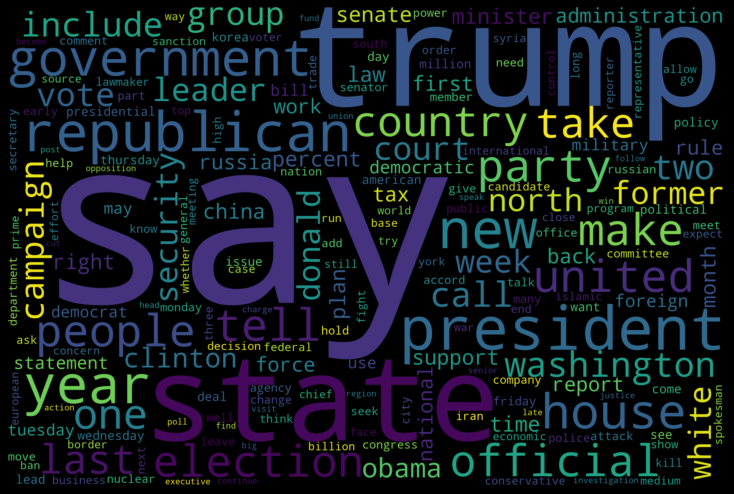

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

vocab = " ".join(noticia for noticia in noticias[noticias.fake == 0]['noticia_tratada_lemma'])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    collocations=False).generate(vocab)
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Notícias falsas

In [7]:
hero.top_words(noticias.loc[noticias.fake == 1,"noticia_tratada_lemma"])[:10]

trump        88279
say          55457
president    29272
people       27003
one          25787
make         25113
would        23656
obama        21233
clinton      20705
get          19417
Name: noticia_tratada_lemma, dtype: int64

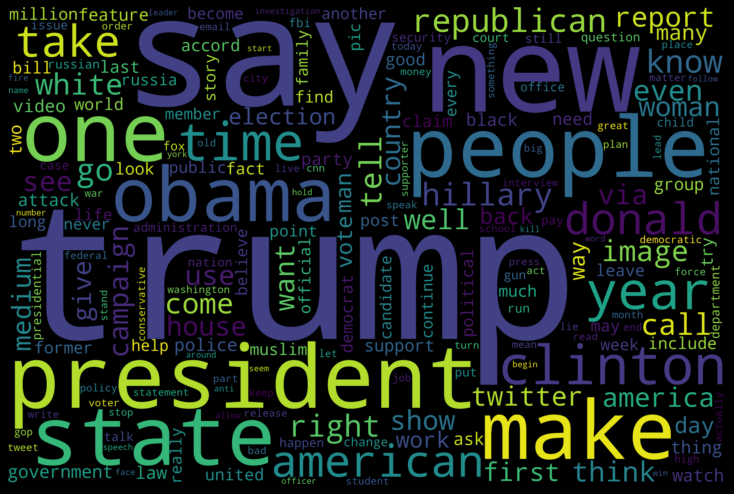

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

vocab = " ".join(noticia for noticia in noticias[noticias.fake == 1]['noticia_tratada_lemma'])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    collocations=False).generate(vocab)
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Para notícias verdadeiras e falsas é possível ver que "trump" é uma das palavras mais citadas.

#Avaliação do campo Subject
Pela avaliação do campo "subject" verificamos que as notícias verdadeiras tem assuntos diferentes das notícias falsas. Dessa forma não poderemos usar esse campo em nosso modelo.

In [9]:
assunto_count = noticias.groupby(['subject','fake'])[['fake']].count()
#Transformando o indice em coluna
assunto_count.rename(columns={'fake':'número de notícias'}, inplace=True)
assunto_count.reset_index(inplace=True)
assunto_count.sort_values('número de notícias',ascending=False,inplace=True)
assunto_count.fake = assunto_count.fake.replace(0,'Verdadeira').replace(1,'Falsa')
assunto_count

,subject,fake,número de notícias
6,politicsNews,Verdadeira,11272
7,worldnews,Verdadeira,10145
2,News,Falsa,9050
5,politics,Falsa,6841
4,left-news,Falsa,4459
0,Government News,Falsa,1570
3,US_News,Falsa,783
1,Middle-east,Falsa,778


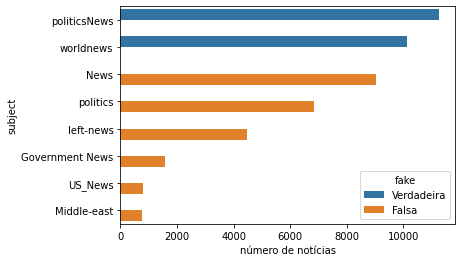

In [10]:
sns.barplot(x='número de notícias', y='subject', data=assunto_count, dodge=True, hue='fake')


#Avaliação do campo date
Analisando o histograma de datas das notícias verdadeiras e falsas vemos que as notícias falsas estão distribuidas em um período maior, entre 2015 e início de 2018. Já as notícias verdadeiras tem uma concentração maior no final de 2017 com menor quantidade entre 2016 e 2017. Isso indica um risco que assuntos mais comentados no fim de 2017 sejam classificados como verdadeiros mas não vamos alterar a distribuição desses dados em nossa análise. Como a data não tem relação com uma notícia ser verdadeira ou falsa, não utilizaremos esse campo em nosso modelo.

In [11]:
from datetime import datetime

def converter_data(text):
    #mes = {'Jan':'January', 'Feb':'February', 'Mar':'March', 'Apr':'April', 'Jun':'June', 'Jul':'July', 'Aug':'August', 'Sep':'September', 'Oct':'October', 'Nov':'November', 'Dec':'December'}
    text =  text.replace('Jan ','January ').replace('Feb ','February ').replace('Mar ','March ').replace( 'Apr ','April ').replace( 'Jun ','June ').replace( 'Jul ','July ').replace( 'Aug ','August ').replace( 'Sep ','September ').replace( 'Oct ','October ').replace( 'Nov ','November ').replace( 'Dec ','December ').strip()
    return datetime.strptime(text, '%B %d, %Y').date()


In [12]:
noticias_data = noticias[['date','fake']]
noticias_data.set_index('date', inplace=True)
#Retirando campos de data que estão fora do padrão para fazer a conversão
noticias_data = noticias_data.filter(regex='([a-zA-Z]+ \d+, \d{4})', axis=0)
noticias_data.reset_index(inplace=True)
noticias_data['date'] = noticias_data['date'].apply(converter_data)

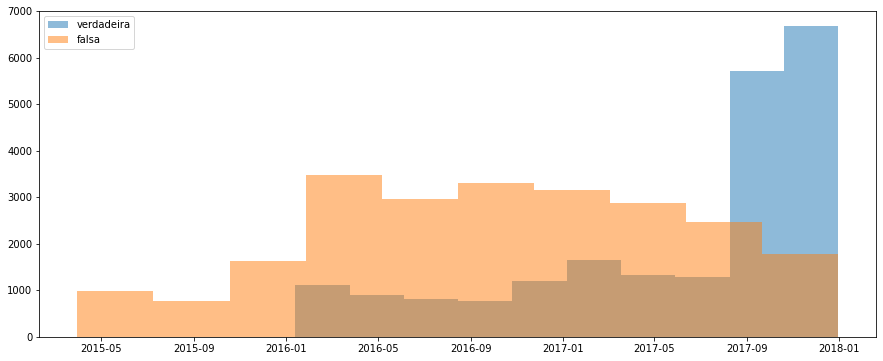

In [13]:
plt.rcParams["figure.figsize"] = (15,6)
plt.hist(noticias_data[noticias_data['fake']==0]['date'], label='verdadeira', stacked=True, alpha = 0.5)
plt.hist(noticias_data[noticias_data['fake']==1]['date'], label='falsa', stacked=True, alpha = 0.5)
plt.legend(loc='upper left')
plt.show()

##Quantidade de palavras por notícia
Não observamos correlação da quantidade de palavras das notícias verdadeiras e falsas com sua veracidade.
Nos boxplot vemos que existe grande concentração das notícias em torno de 200 palavras para notícias verdadeiras e falsas.

In [14]:
def contar_palavras(texto):
    num_palavras = len(str(texto).split())
    return num_palavras

In [15]:
noticias['num_palavras'] = noticias['noticia_tratada_lemma'].apply(lambda x: contar_palavras(x))


In [16]:
noticias.head()

,subject,date,fake,noticia_tratada_lemma,num_palavras
0,politicsNews,"June 3, 2016",0,obama commute prison term non violent drug off...,207
1,politics,"Mar 9, 2017",1,lol nancy pelosi sure ironically even word,7
2,US_News,"August 20, 2017",1,episode sunday wire trigger warning politic gi...,213
3,worldnews,"December 5, 2017",0,saudi king warn trump embassy move jerusalem a...,97
4,worldnews,"November 30, 2017",0,seek urgent medical evacuation syria eastern g...,268


Text(0.5, 1.0, 'Correlação do número de palavras com a veracidade')

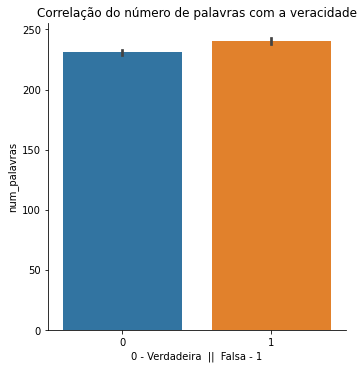

In [17]:
sns.catplot(x='fake', y='num_palavras', kind='bar', data=noticias)
plt.xlabel('0 - Verdadeira  ||  Falsa - 1')
plt.title('Correlação do número de palavras com a veracidade')

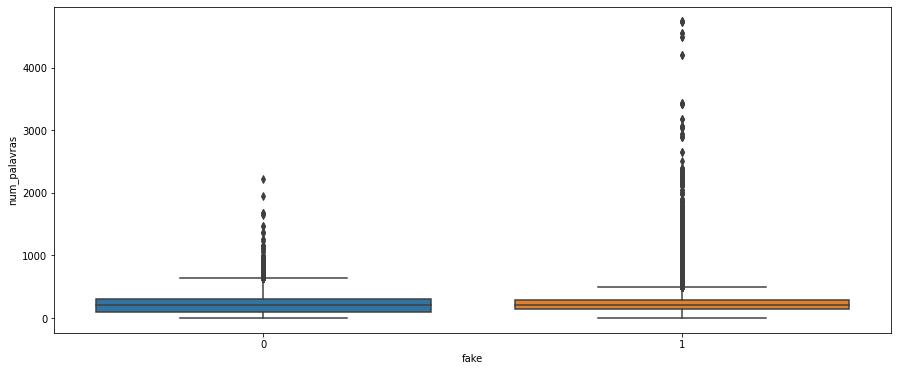

In [18]:
sns.boxplot(x='fake', y='num_palavras', data=noticias)


In [19]:
noticias.query(f'fake == 0')['num_palavras'].describe()



count    21417.000000
mean       230.955036
std        157.396106
min          4.000000
25%         92.000000
50%        215.000000
75%        311.000000
max       2228.000000
Name: num_palavras, dtype: float64

In [20]:
noticias.query(f'fake == 1')['num_palavras'].describe()


count    23481.000000
mean       240.381755
std        227.778984
min          0.000000
25%        142.000000
50%        206.000000
75%        284.000000
max       4742.000000
Name: num_palavras, dtype: float64

Verificando se o número de palavras por notícia tem uma distribuição normal

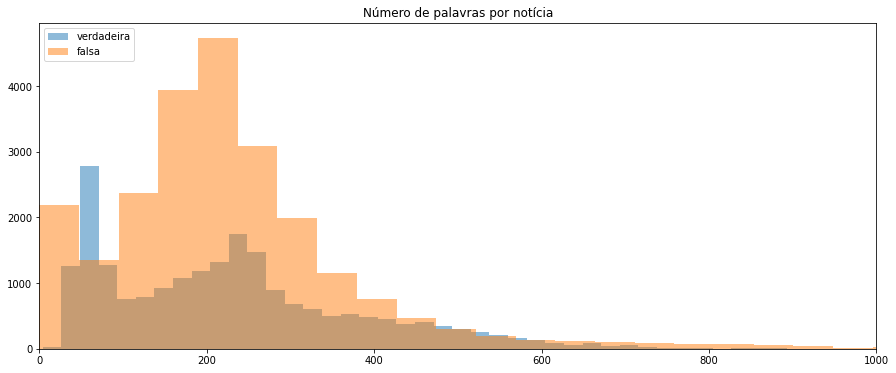

In [21]:
plt.rcParams["figure.figsize"] = (15,6)
plt.hist(noticias[noticias['fake']==0]['num_palavras'], label='verdadeira', stacked=True, alpha = 0.5, bins = 100)
plt.hist(noticias[noticias['fake']==1]['num_palavras'], label='falsa', stacked=True, alpha = 0.5, bins = 100)
plt.legend(loc='upper left')
plt.title('Número de palavras por notícia')
plt.xlim(0,1000)
plt.show()

O teste de Shapiro-Wilk nos indica que a quantidade de palavras não possui distribuição normal (p < 0.05).
Apesar de haver uma informação no resultado do teste que o p-value perde precisão para um conjunto maior que 5000, o resultado de p-value próximo de 0 indica que podemos rejeitar a hipótese nula, de que a distribuição seria normal.

In [22]:
from scipy import stats
shapiro_test = stats.shapiro(noticias['num_palavras'])
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6936333179473877, 0.0)

Para comparar duas amostras com distribuição não-normal utilizaremos o Mann-Whitney U test. Esse teste compara a soma do ranking dos elementos ordenados a fim de analisar a semelhança das amostras.
H0 - As amostras tem a mesma distribuição
H1 - As amostras tem distribuição diferentes
Significância 0,05

Como o resultado apresenta p-value>0,05 (p-value = 0,33) , não podemos rejeitar a hipótese nula, de que as amostras possuem a mesma distribuição.

In [23]:
#Mann-Whitney U test para comparação de amostras em distribuições não normais
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

from scipy.stats import mannwhitneyu
mannwhitneyu_test = mannwhitneyu(noticias[noticias['fake']==0]['num_palavras'], noticias[noticias['fake']==1]['num_palavras'])
mannwhitneyu_test

MannwhitneyuResult(statistic=250863995.0, pvalue=0.33560058650328767)

#Preparação dos dados para o modelo

##Seleção de campos para análise
Após exploração dos dados, não identificamos características relevantes que justificassem a utilização de outros campos além do título e texto (noticia_tratada_lemma). Demais campos não serão utilizados para treinar o modelo.

In [24]:
noticias.drop(columns=['subject', 'date','num_palavras'], inplace=True)


In [25]:
noticias.head()

,fake,noticia_tratada_lemma
0,0,obama commute prison term non violent drug off...
1,1,lol nancy pelosi sure ironically even word
2,1,episode sunday wire trigger warning politic gi...
3,0,saudi king warn trump embassy move jerusalem a...
4,0,seek urgent medical evacuation syria eastern g...


##Separando dados de treino e teste
80% treino 20% teste

In [26]:
from sklearn.model_selection import train_test_split


X_treino, X_teste, y_treino, y_teste = train_test_split(noticias['noticia_tratada_lemma'], 
                                                    noticias['fake'], 
                                                    stratify=noticias['fake'], 
                                                    random_state=999)

##TF-IDF

Vamos fazer o feature extraction com TF-IDF configurado para usar unigramas e bigramas e um máximo de 1.000 features. (Sem essa limitação chegaria a 2.761.431 features). Foi incluido o uso de bigramas para captar termos que usam mais de uma palavra como "white house" por exemplo.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=1000) 
tfidf.fit(X_treino)

TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [28]:
X_treino_tfidf = tfidf.transform(X_treino)
X_teste_tfidf = tfidf.transform(X_teste)

In [29]:
X_treino_tfidf

<33673x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3107583 stored elements in Compressed Sparse Row format>

Para os modelos Naive Bayes e XGBoost os dados de entrada utilizados serão a "sparce matrix" gerada pelo TFIDF.
Para a rede LSTM teremos que redimensionar essa matriz para um tensor 3D conforme abaixo. 

In [30]:
#Transformar em 3D para LSTM - (amostras,observações(1),features)
X_treino_tfidf_3Darray =X_treino_tfidf.toarray().reshape(X_treino_tfidf.toarray().shape[0],1,X_treino_tfidf.toarray().shape[-1])
X_teste_tfidf_3Darray =X_teste_tfidf.toarray().reshape(X_teste_tfidf.toarray().shape[0],1,X_teste_tfidf.toarray().shape[-1])

X_treino_tfidf_3Darray.shape, X_teste_tfidf_3Darray.shape



((33673, 1, 1000), (11225, 1, 1000))